# Sprocket Central Pty Ltd Data Quality Assessment

## Task
The client has asked our team to assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues.  Can you please take a look at the datasets we’ve received and draft an email to them identifying the data quality issues and how this may impact our analysis going forward?

Can you please review the data quality to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

## Data Overview
##### The workbook contains the following datasets:

- Customer Demographic 
- Customer Addresses
- Transaction data in the past three months


### Problem Statement
Identifying the data quality issues and strategies to mitigate these issues.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The excel file containing the data
xlsx = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")
xlsx

In [3]:
#Load different excel sheets
t_df = pd.read_excel(xlsx, 'Transactions')
nc_df = pd.read_excel(xlsx, 'NewCustomerList')
cd_df = pd.read_excel(xlsx, 'CustomerDemographic')
ca_df = pd.read_excel(xlsx, 'CustomerAddress')

In [4]:
#Use first row as columns
t_df.columns = t_df.iloc[0]
nc_df.columns = nc_df.iloc[0]
cd_df.columns = cd_df.iloc[0]
ca_df.columns = ca_df.iloc[0]

# 1. Data quality and assessment of Transaction data

In [5]:
t_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [6]:
# Drop first row
t_df.drop(index = t_df.index[0], inplace = True)

In [7]:
t_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [8]:
#size
t_df.shape

(20000, 13)

In [9]:
#Columns
t_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [10]:
# Columns info
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


- Incorrect column data type: The transaction date and product_first_sold_date columns is formatted as object rather than date time.
    - list price,the id columns and standard cost columns are formatted as objects instead of floats
- There are missing values, for columns that have a count less than the total entries.

In [11]:
# Convert to datetime
t_df["transaction_date"] = pd.to_datetime(t_df['transaction_date'])
t_df['product_first_sold_date'] = pd.to_datetime(t_df['product_first_sold_date'])

In [12]:
#Convert to float
t_df[["list_price", "standard_cost"]] = t_df[["list_price", "standard_cost"]].astype(float)

In [13]:
# Convert to integers
t_df[['transaction_id', 'product_id', 'customer_id']] = t_df[['transaction_id', 'product_id', 'customer_id']].astype(int)

In [14]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int32         
 1   product_id               20000 non-null  int32         
 2   customer_id              20000 non-null  int32         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [15]:
#Statistical description
t_df.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,582.825242,405.955660
min,1.000000,0.00000,1.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,2091.470000,1759.850000


In [16]:
# Check for duplicates
t_df.duplicated().sum()

0

In [17]:
# Missing values
def missing_values(x):
    return(sum(x.isnull()))

print("Missing values: ")
t_df.apply(missing_values).where(lambda x: x!=0).dropna()


Missing values: 


0
online_order               360.0
brand                      197.0
product_line               197.0
product_class              197.0
product_size               197.0
standard_cost              197.0
product_first_sold_date    197.0
dtype: float64

In [18]:
# Check for unique values in the columns with missing values  {Categorical columns}
print("Online Order: \n", t_df.online_order.unique())
print("Brand: \n", t_df.brand.unique())
print("Product Line: \n", t_df.product_line.unique())
print("Product Class: \n", t_df.product_class.unique())
print("Product Size: \n", t_df.product_size.unique())

Online Order: 
 [False True nan]
Brand: 
 ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
Product Line: 
 ['Standard' 'Road' 'Mountain' 'Touring' nan]
Product Class: 
 ['medium' 'low' 'high' nan]
Product Size: 
 ['medium' 'large' 'small' nan]


In [19]:
#Filling missing values for categorical columns with mode
t_df['online_order'] = t_df['online_order'].fillna(t_df['online_order'].mode()[0])
t_df['brand'] = t_df['brand'].fillna(t_df['brand'].mode()[0])
t_df['product_line'] = t_df['product_line'].fillna(t_df['product_line'].mode()[0])
t_df['product_class'] = t_df['product_class'].fillna(t_df['product_class'].mode()[0])
t_df['product_size'] = t_df['product_size'].fillna(t_df['product_size'].mode()[0])

In [20]:
t_df["product_first_sold_date"] = t_df["product_first_sold_date"].fillna(method = 'ffill')

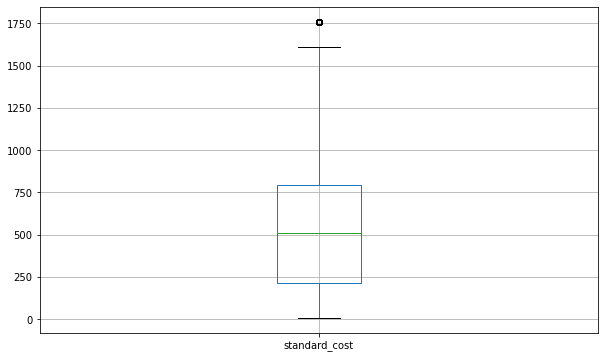

In [21]:
# Plot a boxplot to check for outliers
plt.figure(figsize=(10,6))
fig = t_df.boxplot(column = 'standard_cost')

In [22]:
t_df['standard_cost'] = t_df['standard_cost'].fillna(t_df['standard_cost'].median())

In [23]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int32         
 1   product_id               20000 non-null  int32         
 2   customer_id              20000 non-null  int32         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

# 2.Data Quality and Assessment of New Customer Data

In [24]:
nc_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125


In [25]:
#Drop first row
nc_df.drop(index = nc_df.index[0], inplace = True)

In [26]:
nc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   object 
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   object 
 11  address                       

In [27]:
nc_df.columns

Index([                         'first_name',
                                 'last_name',
                                    'gender',
       'past_3_years_bike_related_purchases',
                                       'DOB',
                                 'job_title',
                     'job_industry_category',
                            'wealth_segment',
                        'deceased_indicator',
                                  'owns_car',
                                    'tenure',
                                   'address',
                                  'postcode',
                                     'state',
                                   'country',
                        'property_valuation',
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                  

In [28]:
# Remove unnamed columns
nc_df.drop(nc_df.columns[[16, 17, 18, 19, 20]], axis = 1, inplace = True)

In [29]:
nc_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object', name=0)

In [30]:
nc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 n

### Convert columns to correct data type


In [31]:
# Convert Date of Birth to date time
nc_df["DOB"] = pd.to_datetime(nc_df.DOB)

In [32]:
nc_df[["past_3_years_bike_related_purchases", "property_valuation", "Rank", "Value"]] = nc_df[["past_3_years_bike_related_purchases", "property_valuation", "Rank", "Value"]].astype(int)

In [33]:
#Column information after transformation
nc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int32         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure      

In [34]:
# Missing values
def missing_values(x):
    return(sum(x.isnull()))

print("Missing values: ")
nc_df.apply(missing_values).where(lambda x: x!=0).dropna()

Missing values: 


0
last_name                 29.0
DOB                       17.0
job_title                106.0
job_industry_category    165.0
dtype: float64

In [35]:
nc_df["job_title"] = nc_df["job_title"].fillna(nc_df["job_title"].mode()[0])
nc_df["job_industry_category"] = nc_df["job_industry_category"].fillna(nc_df["job_industry_category"].mode()[0])

In [36]:
nc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int32         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure      

### Conclusions:
The DOB and last name columns have missing values, but we cannot make assumptions at this stage for the name or the date of birth of the customer

# 3.Data Quality and Assessment of Customer Demographic data

In [37]:
cd_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [38]:
# Drop first row
cd_df.drop(index = cd_df.index[0], inplace = True)

In [39]:
# Size
cd_df.shape

(4000, 13)

In [40]:
# Information of the data
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

- There are missing values in the data.
- Some of the columns are formatted with the wrong data type

### Format column data type correctly

In [41]:
#Convert DOB to dataetime
cd_df["DOB"] = pd.to_datetime(cd_df.DOB)

In [42]:
# Convert past_3_years_bike_related_purchases, customer id and tenure columns to integer type
cd_df[["past_3_years_bike_related_purchases", "tenure", "customer_id"]] = cd_df[["past_3_years_bike_related_purchases", "tenure", "customer_id"]].astype(float)

In [43]:
#Columns
cd_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object', name=0)

In [44]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   float64       
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   float64       
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [45]:
#Remove redudant column (default)
cd_df.drop("default", axis = 1, inplace = True)

In [46]:
# Check for unique values in the gender column
print("Gender: \n", cd_df.gender.unique())

Gender: 
 ['F' 'Male' 'Female' 'U' 'Femal' 'M']


In [47]:
# Format the gender column values correctly
cd_df.gender.replace(["F","Femal"], "Female", inplace = True)
cd_df.gender.replace("M", "Male", inplace = True)
cd_df.gender.replace("U", "Unknown", inplace = True)
print("Gender: \n", cd_df.gender.unique())

Gender: 
 ['Female' 'Male' 'Unknown']


In [48]:
# Check for missing values
def missing_values(x):
    return (sum(x.isna()))
print("Missing values: ")

cd_df.apply(missing_values).where(lambda x : x != 0).dropna()

Missing values: 


0
last_name                125.0
DOB                       87.0
job_title                506.0
job_industry_category    656.0
tenure                    87.0
dtype: float64

In [49]:
#Check for duplicates
cd_df.duplicated().sum()

0

In [50]:
#Fill in missing values
cd_df["tenure"] = cd_df["tenure"].fillna(cd_df["tenure"].mode()[0])
cd_df["job_title"] = cd_df["job_title"].fillna(cd_df["job_title"].mode()[0])
cd_df["job_industry_category"] = cd_df["job_industry_category"].fillna(cd_df["job_industry_category"].mode()[0])

In [51]:
# Check the information after cleaning
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   float64       
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   float64       
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

### Conclusion:
The last name and Date of Birth columns still have missing values, we cannot make assumptions on this but the missing values can be replaced with Unknown or the columns remove if they are not necessary in the analysis of the data.

#  4.Data Quality and Assessment of Customer Address data

In [52]:
ca_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [53]:
# remove first row
ca_df.drop(index = ca_df.index[0], inplace = True)

In [54]:
# Statistical description of the data
ca_df.describe()

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,1,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


In [55]:
# The information of the data
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


- From the entries information of the data: No missing values in the data

In [56]:
#Check for duplicates
ca_df.duplicated().sum()

0

In [57]:
# Format columns with correct data type
ca_df[["customer_id", "postcode", "property_valuation"]] = ca_df[["customer_id", "postcode", "property_valuation"]].astype(int)

In [58]:
#Information
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int32 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int32 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int32 
dtypes: int32(3), object(3)
memory usage: 140.7+ KB


# Overall Conclusion
#### An email to the Client.

Dear Client, 

I write to provide feedback on the data quality issues of the datasets you provided from your company and provide relevant strategies that would be helpful to mitigate these issues.

The summary of the underlying issues is as follows for each dataset:
##### Transaction data:
- Incorrect column data type: The transaction date and product_first_sold_date columns are formatted as objects rather than date time.
- list price, the id columns and standard cost columns are formatted as objects instead of floats
- There are missing values for columns with counts less than the total entries.
##### New Customer data:
- Incorrect column data type: The DOB column is formatted as an object rather than date time. The past_3_years_bike_related_purchases, property_valuation, Rank, and Value columns are formatted as objects rather than integers or floats.
- Redundant columns, which are unnamed and Nan’s.
- There are missing values for columns with counts less than the total entries.
##### Customer Demographic data
- The DOB column is formatted as an object rather than a date time. The tenure, customer_id, and past_3_years_bike_related_purchases columns are formatted as objects rather than integers.
- Inconsistent column values in the gender column. 
- There are missing values for columns with counts less than the total entries.
##### Customer Address data:
- Incorrect column data type formatting: customer_id, postcode, property_valuation are formatted as objects rather than integers.
##### Conclusions on the Customer Demographic and New Customer datasets:
The last name and Date of Birth columns still have missing values, we cannot make assumptions on this, but the missing values can be replaced with Unknown, or the columns removed if they are not necessary for the data analysis.

##### Strategies to mitigate these data quality issues:
- The company should fix the original data sources with the source system being set up to clean the data automatically before it enters the database.
- Fix the customer data during the Extract, transform, and load process.
- Use systems that automatically exclude incomplete entries.
- Automate the data verification processes to identify and correct inconsistent data formats early.

Yours Sincerely,

Jane Wangari

Intern Data Scientist KPMG Australia.
